# **Evaluacion y analisis de modelos, casos porblema de regresión y clasificación**

### **Librerias:**

In [ ]:
# Importing necessary libraries for data manipulation, visualization, and model evaluation
import pandas as pd  # For handling and analyzing data
import matplotlib.pyplot as plt  # For creating visualizations
import time  # For measuring execution time

# Importing scikit-learn modules for machine learning tasks
from sklearn.model_selection import train_test_split, GridSearchCV  # For splitting data and hyperparameter tuning
from sklearn.pipeline import Pipeline  # For creating machine learning pipelines
from sklearn.preprocessing import StandardScaler  # For scaling features
from sklearn.linear_model import Ridge, Lasso  # For linear regression models with regularization
from sklearn.ensemble import RandomForestRegressor  # For ensemble-based regression

# Importing XGBoost library for gradient boosting regression
from xgboost import XGBRegressor  # For implementing XGBoost regression

# Importing metrics for evaluating regression models
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error  # For calculating performance metrics

In [ ]:
# Load the dataset from the specified file path
# Ensure the file path is correct and accessible
# Use relative paths cautiously to avoid issues when sharing or moving the notebook
df = pd.read_csv('..\df_final.csv')  # Load the dataset


## **Caso problema: Evaluación del potencial de energía Solar en Barranquilla: Análisis de irradiancia y variables atmosféricas para la generación sostenible**

### **Contextualización**

El creciente interés por las fuentes de energía limpias y renovables ha generado una demanda creciente en el uso de recursos solares, tanto en entornos urbanos como en zonas costeras. **Barranquilla**, ubicada geográficamente en el Caribe colombiano, se beneficia de una alta exposición a la radiación solar durante la mayor parte del año, lo que representa una gran oportunidad para el desarrollo de proyectos de generación fotovoltaica.

Sin embargo, la capacidad de aprovechamiento de la energía solar no depende únicamente de la radiación solar incidente, sino también de varios **factores atmosféricos** como la temperatura, la humedad, la nubosidad, el viento y la presión, los cuales influyen directamente en la eficiencia de los sistemas solares.

Este trabajo presenta un **análisis cuantitativo del potencial de generación solar en Barranquilla**, a partir del uso de datos históricos de irradiancia difusa, índice UV y variables meteorológicas recopiladas entre los años 2020 y 2025. El objetivo es construir un **modelo de regresión** que permita predecir un índice compuesto denominado `SolarIndex`, el cual representa una estimación del potencial energético solar considerando múltiples condiciones atmosféricas simultáneamente.

La modelización de este índice permitirá identificar **zonas y periodos del año con mayor rendimiento potencial**, sirviendo como insumo para la planificación energética, la ubicación estratégica de sistemas fotovoltaicos y el diseño de **políticas públicas sostenibles**.

In [ ]:
# === Definition of predictor variables and target variable for regression model ===

# List of independent variables (features) used to estimate solar potential
feature_cols = [
    'T2M',       # Temperature at 2 meters
    'RH2M',      # Relative humidity at 2 meters
    'WS10M',     # Wind speed at 10 meters
    'WD10M',     # Wind direction at 10 meters
    'PS',        # Surface pressure
    'T2MDEW',    # Dew point temperature at 2 meters
    'T2MWET',    # Wet bulb temperature
    'WS50M'      # Wind speed at 50 meters
]

# Define predictor variables (X) and target variable (y)
# - X: DataFrame containing the selected feature columns
# - y: Series containing the target variable 'SolarIndex'
X = df[feature_cols]  # Extract features from the dataset
y = df['SolarIndex']  # Extract the target variable




### **Modelos para el caso de regresión y Benchmark**

In [ ]:
# === Split the dataset into training and testing sets ===
# - X_train, X_test: Predictor variables for training and testing
# - y_train, y_test: Target variable for training and testing
# - test_size=0.2: 20% of the data is allocated for testing
# - random_state=42: Ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# === Initialize a dictionary to store model results ===
# This dictionary will hold performance metrics for each model
# Metrics such as R², MSE, MAE, and training time will be stored for comparison
model_results = {}

### **Ridge Regression**

In [ ]:
# === Ridge Regression Pipeline Configuration ===

# Create a pipeline that includes:
# - StandardScaler: Standardizes the predictor variables to have mean=0 and variance=1
# - Ridge: Ridge regression model for regularized linear regression
ridge_pipe = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Feature scaling for normalization
    ('model', Ridge())  # Step 2: Ridge regression model
])

# Define the hyperparameter grid for alpha (regularization strength)
ridge_params = {'model__alpha': [0.01, 0.1, 1, 10, 100]}  # Range of alpha values to test

# Use GridSearchCV for hyperparameter tuning with 5-fold cross-validation
ridge_grid = GridSearchCV(ridge_pipe, ridge_params, cv=5)  # Optimize alpha using cross-validation

# === Model Training and Timing ===

# Start the timer to measure training time
start_time = time.time()  # Record the start time

# Train the Ridge regression model using the training data
ridge_grid.fit(X_train, y_train)  # Fit the model and perform hyperparameter search

# Stop the timer after training is complete
end_time = time.time()  # Record the end time

# Predict the target variable for the test dataset
y_pred_ridge = ridge_grid.predict(X_test)  # Generate predictions on the test set

# Calculate the total training time
ridge_training_time = end_time - start_time  # Compute the elapsed training time in seconds


#### **Evalución** 

In [ ]:
# === Model Evaluation and Results Storage ===

# Store key performance metrics for the Ridge model:
# - 'Best Alpha': The best alpha value found during grid search
# - 'R2': Coefficient of determination, measures the goodness of fit of the model
# - 'MSE': Mean Squared Error, measures the average squared difference between actual and predicted values
# - 'MAE': Mean Absolute Error, measures the average absolute difference between actual and predicted values
# - 'Training Time (s)': Total training time in seconds, rounded to 2 decimal places
model_results['Ridge'] = {
    'Best Alpha': ridge_grid.best_params_['model__alpha'],  # Best hyperparameter alpha
    'R2': r2_score(y_test, y_pred_ridge),  # Coefficient of determination
    'MSE': mean_squared_error(y_test, y_pred_ridge),  # Mean Squared Error
    'MAE': mean_absolute_error(y_test, y_pred_ridge),  # Mean Absolute Error
    'Training Time (s)': round(ridge_training_time, 2)  # Training time rounded to 2 decimals
}

# Print the Ridge model results in a clear and structured format
print("Ridge Regression Results:")
print(f"Best Alpha: {model_results['Ridge']['Best Alpha']}")  # Best alpha value
print(f"R²: {model_results['Ridge']['R2']}")  # Coefficient of determination
print(f"MSE: {model_results['Ridge']['MSE']}")  # Mean Squared Error
print(f"MAE: {model_results['Ridge']['MAE']}")  # Mean Absolute Error
print(f"Training Time: {model_results['Ridge']['Training Time (s)']} seconds")  # Training time

Ridge Regression Results:
Best Alpha: 10
R²: 0.2555147596091165
MSE: 0.0012891001803958992
MAE: 0.022108922788286807
Training Time: 5.76 seconds


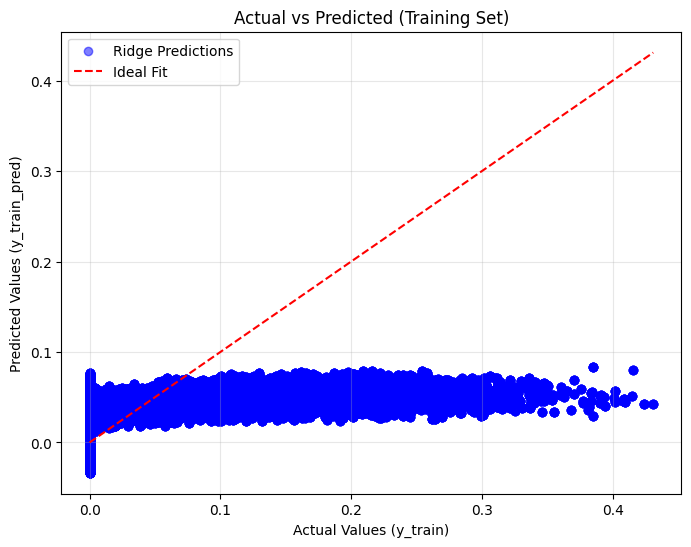

In [ ]:
# === Predicted values for the training set using the Ridge model ===
# Use the trained Ridge model (ridge_grid) to predict the target variable for the training set
y_train_pred_ridge = ridge_grid.predict(X_train)

# === Plotting actual vs predicted values for the training set ===
# Create a scatter plot to visualize the relationship between actual and predicted values
plt.figure(figsize=(8, 6))  # Set the figure size for better readability
plt.scatter(
    y_train, y_train_pred_ridge, alpha=0.5, color='blue', label='Ridge Predictions'
)  # Scatter plot of actual vs predicted values
plt.plot(
    [y_train.min(), y_train.max()],
    [y_train.min(), y_train.max()],
    color='red',
    linestyle='--',
    label='Ideal Fit',
)  # Plot the ideal fit line (y = x) for reference
plt.title('Actual vs Predicted (Training Set)')  # Add a title to the plot
plt.xlabel('Actual Values (y_train)')  # Label for the x-axis
plt.ylabel('Predicted Values (y_train_pred)')  # Label for the y-axis
plt.legend()  # Add a legend to distinguish the scatter points and the ideal fit line
plt.grid(alpha=0.3)  # Add a grid with light transparency for better visualization
plt.show()  # Display the plot

#### **Análisis del modelo**

---

### **Lasso Regression**

In [10]:
# === Configuration of the pipeline for Lasso Regression ===

# Create a pipeline that includes:
# - StandardScaler: Standardizes the predictor variables to have mean=0 and variance=1
# - Lasso: Lasso regression model for regularized linear regression
lasso_pipe = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Feature scaling for normalization
    ('model', Lasso(max_iter=10000))  # Step 2: Lasso regression model with increased max iterations
])

# Define the hyperparameter grid for alpha (regularization strength)
lasso_params = {'model__alpha': [0.01, 0.1, 1, 10]}  # Range of alpha values to test

# Use GridSearchCV for hyperparameter tuning with 5-fold cross-validation
lasso_grid = GridSearchCV(lasso_pipe, lasso_params, cv=5)  # Optimize alpha using cross-validation

# === Model Training and Timing ===

# Start the timer to measure training time
start_time = time.time()  # Record the start time

# Train the Lasso regression model using the training data
lasso_grid.fit(X_train, y_train)  # Fit the model and perform hyperparameter search

# Stop the timer after training is complete
end_time = time.time()  # Record the end time

# Predict the target variable for the test dataset
y_pred_lasso = lasso_grid.predict(X_test)  # Generate predictions on the test set

# Calculate the total training time
lasso_training_time = end_time - start_time  # Compute the elapsed training time in seconds



#### **Evalución** 

In [11]:
# === Model Evaluation and Results Storage ===

# Store key performance metrics for the Lasso model:
# - 'Best Alpha': The best alpha value found during grid search
# - 'R2': Coefficient of determination, measures the goodness of fit of the model
# - 'MSE': Mean Squared Error, measures the average squared difference between actual and predicted values
# - 'MAE': Mean Absolute Error, measures the average absolute difference between actual and predicted values
# - 'Training Time (s)': Total training time in seconds, rounded to 2 decimal places
model_results['Lasso'] = {
    'Best Alpha': lasso_grid.best_params_['model__alpha'],  # Best hyperparameter alpha
    'R2': r2_score(y_test, y_pred_lasso),  # Coefficient of determination
    'MSE': mean_squared_error(y_test, y_pred_lasso),  # Mean Squared Error
    'MAE': mean_absolute_error(y_test, y_pred_lasso),  # Mean Absolute Error
    'Training Time (s)': round(lasso_training_time, 2)  # Training time rounded to 2 decimals
}

# Print the Lasso model results in a clear and structured format
print("Lasso Regression Results:")
print(f"Best Alpha: {model_results['Lasso']['Best Alpha']}")  # Best alpha value
print(f"R²: {model_results['Lasso']['R2']}")  # Coefficient of determination
print(f"MSE: {model_results['Lasso']['MSE']}")  # Mean Squared Error
print(f"MAE: {model_results['Lasso']['MAE']}")  # Mean Absolute Error
print(f"Training Time: {model_results['Lasso']['Training Time (s)']} seconds")  # Training time


Lasso Regression Results:
Best Alpha: 0.01
R²: 0.09657400853221798
MSE: 0.0015643112118166353
MAE: 0.019309069278737382
Training Time: 5.15 seconds


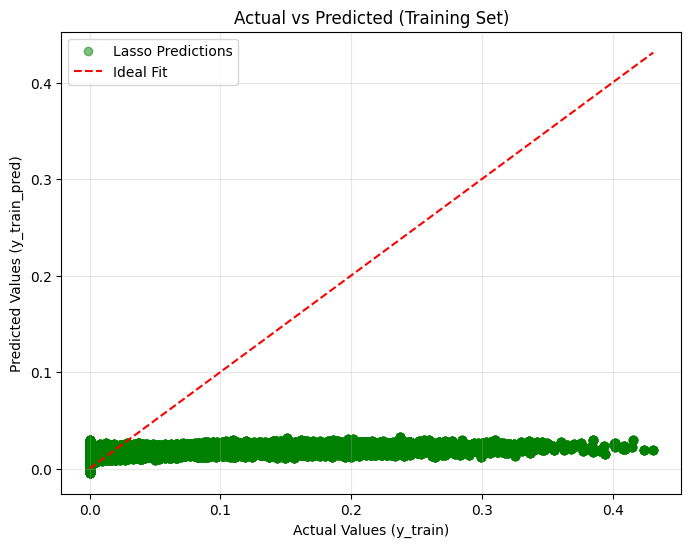

In [12]:
# === Prediction on the training set using the Lasso model ===

# Use the trained Lasso model (lasso_grid) to predict the target variable for the training set
y_train_pred_lasso = lasso_grid.predict(X_train)

# === Visualization: Actual vs Predicted Values (Training Set) ===

# Create a scatter plot to compare actual and predicted values
plt.figure(figsize=(8, 6))  # Set the figure size for better readability
plt.scatter(
    y_train, y_train_pred_lasso, alpha=0.5, color='green', label='Lasso Predictions'
)  # Scatter plot of actual vs predicted values
plt.plot(
    [y_train.min(), y_train.max()],
    [y_train.min(), y_train.max()],
    color='red',
    linestyle='--',
    label='Ideal Fit',
)  # Plot the ideal fit line (y = x) for reference
plt.title('Actual vs Predicted (Training Set)')  # Add a title to the plot
plt.xlabel('Actual Values (y_train)')  # Label for the x-axis
plt.ylabel('Predicted Values (y_train_pred)')  # Label for the y-axis
plt.legend()  # Add a legend to distinguish the scatter points and the ideal fit line
plt.grid(alpha=0.3)  # Add a grid with light transparency for better visualization
plt.show()  # Display the plot


#### **Análisis del modelo**

---

### **Random Forest**

In [13]:
# === Optimal Number of Trees (n_estimators) Search ===

# Base Random Forest model without hyperparameter tuning
rf_model = RandomForestRegressor(random_state=42)

# Define the range of values for the number of trees to test
param_grid = {
    'n_estimators': [50, 100, 150, 200, 300]  # Different values for n_estimators
}

# Configure GridSearchCV for hyperparameter tuning
# - cv=5: 5-fold cross-validation
# - scoring='r2': Use R² as the evaluation metric
# - n_jobs=-1: Use all available CPU cores for parallel processing
grid_rf = GridSearchCV(rf_model, param_grid, cv=5, scoring='r2', n_jobs=-1)

# Fit the model to the training data and perform hyperparameter search
grid_rf.fit(X_train, y_train)

# Print the best number of trees (n_estimators) and the corresponding R² score
print("Best number of trees:", grid_rf.best_params_['n_estimators'])  # Optimal n_estimators
print("Best R² from cross-validation:", round(grid_rf.best_score_, 4))  # Best R² score


Best number of trees: 300
Best R² from cross-validation: 1.0


In [14]:
# === Training the Random Forest model with the optimal number of trees ===

# Retrieve the best number of trees (n_estimators) identified by GridSearchCV
best_n_estimators = grid_rf.best_params_['n_estimators']

# Create the final Random Forest model using the optimal number of trees
rf_model = RandomForestRegressor(n_estimators=best_n_estimators, random_state=42)

# Start the timer to measure training time
start_time = time.time()

# Train the Random Forest model using the training dataset
rf_model.fit(X_train, y_train)

# Stop the timer after training is complete
end_time = time.time()

# Predict the target variable for the test dataset
y_pred_rf = rf_model.predict(X_test)

# Calculate the total training time in seconds
rf_training_time = end_time - start_time


#### **Evalución** 

In [15]:
# === Model Evaluation and Results Storage ===

# Store key performance metrics for the Random Forest model:
# - 'R2': Coefficient of determination, measures the goodness of fit of the model
# - 'MSE': Mean Squared Error, measures the average squared difference between actual and predicted values
# - 'MAE': Mean Absolute Error, measures the average absolute difference between actual and predicted values
# - 'Training Time (s)': Total training time in seconds, rounded to 2 decimal places
model_results['Random Forest'] = {
    'R2': r2_score(y_test, y_pred_rf),  # Calculate R² score for the test set
    'MSE': mean_squared_error(y_test, y_pred_rf),  # Calculate Mean Squared Error
    'MAE': mean_absolute_error(y_test, y_pred_rf),  # Calculate Mean Absolute Error
    'Training Time (s)': round(rf_training_time, 2)  # Record training time rounded to 2 decimals
}

# Print the Random Forest model results in a clear and structured format
print("Random Forest Regression Results:")
print(f"R²: {model_results['Random Forest']['R2']}")  # Display R² score
print(f"MSE: {model_results['Random Forest']['MSE']}")  # Display Mean Squared Error
print(f"MAE: {model_results['Random Forest']['MAE']}")  # Display Mean Absolute Error
print(f"Training Time: {model_results['Random Forest']['Training Time (s)']} seconds")  # Display training time


Random Forest Regression Results:
R²: 0.9999988603886977
MSE: 1.973273687340004e-09
MAE: 7.981250684030998e-06
Training Time: 1910.67 seconds


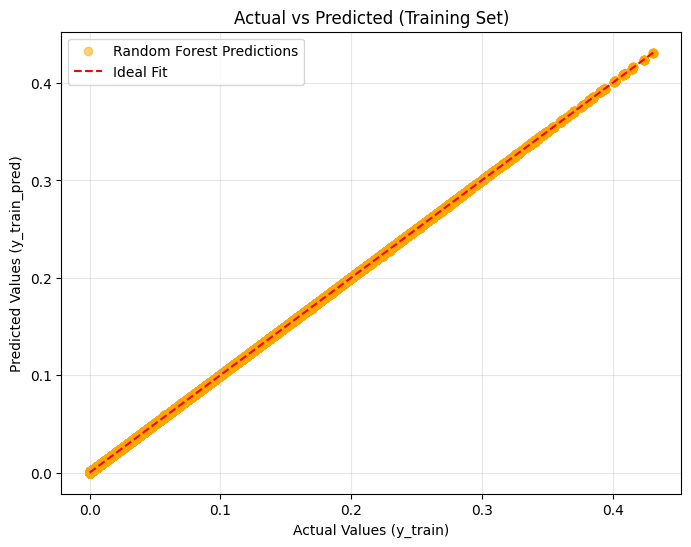

In [16]:
# === Prediction on the training set using the Random Forest model ===

# Use the trained Random Forest model to predict the target variable for the training set
y_train_pred_rf = rf_model.predict(X_train)

# === Visualization: Actual vs Predicted Values (Training Set) ===

# Create a scatter plot to compare actual and predicted values
plt.figure(figsize=(8, 6))  # Set the figure size for better readability
plt.scatter(
    y_train, y_train_pred_rf, alpha=0.5, color='orange', label='Random Forest Predictions'
)  # Scatter plot of actual vs predicted values
plt.plot(
    [y_train.min(), y_train.max()],
    [y_train.min(), y_train.max()],
    color='red',
    linestyle='--',
    label='Ideal Fit',
)  # Plot the ideal fit line (y = x) for reference
plt.title('Actual vs Predicted (Training Set)')  # Add a title to the plot
plt.xlabel('Actual Values (y_train)')  # Label for the x-axis
plt.ylabel('Predicted Values (y_train_pred)')  # Label for the y-axis
plt.legend()  # Add a legend to distinguish the scatter points and the ideal fit line
plt.grid(alpha=0.3)  # Add a grid with light transparency for better visualization
plt.show()  # Display the plot


#### **Análisis del modelo**

---

### **XGBoost**

In [17]:
# === XGBoost Model Hyperparameter Tuning and Training ===

# Initialize the XGBoost model with a fixed random state for reproducibility
# and verbosity set to 0 to suppress unnecessary output
xgb_model = XGBRegressor(random_state=42, verbosity=0)

# Define the hyperparameter grid for GridSearchCV
# - n_estimators: Number of trees in the ensemble
# - learning_rate: Step size shrinkage used in updates to prevent overfitting
# - max_depth: Maximum depth of a tree to control model complexity
xgb_param_grid = {
    'n_estimators': [50, 100, 150, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7]
}

# Configure GridSearchCV for hyperparameter tuning
# - cv=5: Perform 5-fold cross-validation
# - scoring='r2': Use R² as the evaluation metric
# - n_jobs=-1: Utilize all available CPU cores for parallel processing
xgb_grid = GridSearchCV(xgb_model, xgb_param_grid, cv=5, scoring='r2', n_jobs=-1)

# Fit the model to the training data and perform hyperparameter search
xgb_grid.fit(X_train, y_train)

# Print the best hyperparameters found during the grid search
print("Best hyperparameters:", xgb_grid.best_params_)

# Print the best R² score obtained during cross-validation
print("Best R² from cross-validation:", round(xgb_grid.best_score_, 4))

Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}
Best R² from cross-validation: 0.8538


In [18]:
# === Configuration and Training of the XGBoost Model ===

# Create the XGBoost model with 100 trees and a fixed random state for reproducibility
# - n_estimators=100: Specifies the number of trees in the ensemble
# - random_state=42: Ensures consistent results across runs
# - verbosity=0: Suppresses unnecessary output during training
xgb_model = XGBRegressor(n_estimators=100, random_state=42, verbosity=0)

# Start the timer to measure training time
start_time = time.time()  # Record the start time

# Train the XGBoost model using the training dataset
# - X_train: Predictor variables for training
# - y_train: Target variable for training
xgb_model.fit(X_train, y_train)

# Stop the timer after training is complete
end_time = time.time()  # Record the end time

# Predict the target variable for the test dataset
# - X_test: Predictor variables for testing
# - y_pred_xgb: Predicted values for the test set
y_pred_xgb = xgb_model.predict(X_test)

# Calculate the total training time in seconds
xgb_training_time = end_time - start_time  # Compute the elapsed training time


#### **Evalución** 

In [19]:
# === Model Evaluation and Results Storage ===

# Store the evaluation metrics for the XGBoost model in the `model_results` dictionary
# - 'R2': Coefficient of determination, measures the goodness of fit of the model
# - 'MSE': Mean Squared Error, measures the average squared difference between actual and predicted values
# - 'MAE': Mean Absolute Error, measures the average absolute difference between actual and predicted values
# - 'Training Time (s)': Total training time in seconds, rounded to 2 decimal places
model_results['XGBoost'] = {
    'R2': r2_score(y_test, y_pred_xgb),  # Calculate R² score for the test set
    'MSE': mean_squared_error(y_test, y_pred_xgb),  # Calculate Mean Squared Error
    'MAE': mean_absolute_error(y_test, y_pred_xgb),  # Calculate Mean Absolute Error
    'Training Time (s)': round(xgb_training_time, 2)  # Record training time rounded to 2 decimals
}

# Print the evaluation results for the XGBoost model in a structured format
print("XGBoost Regression Results:")
print(f"R²: {model_results['XGBoost']['R2']}")  # Display R² score
print(f"MSE: {model_results['XGBoost']['MSE']}")  # Display Mean Squared Error
print(f"MAE: {model_results['XGBoost']['MAE']}")  # Display Mean Absolute Error
print(f"Training Time: {model_results['XGBoost']['Training Time (s)']} seconds")  # Display training time


XGBoost Regression Results:
R²: 0.8029276172220619
MSE: 0.00034123718027869273
MAE: 0.005863526020261907
Training Time: 2.41 seconds


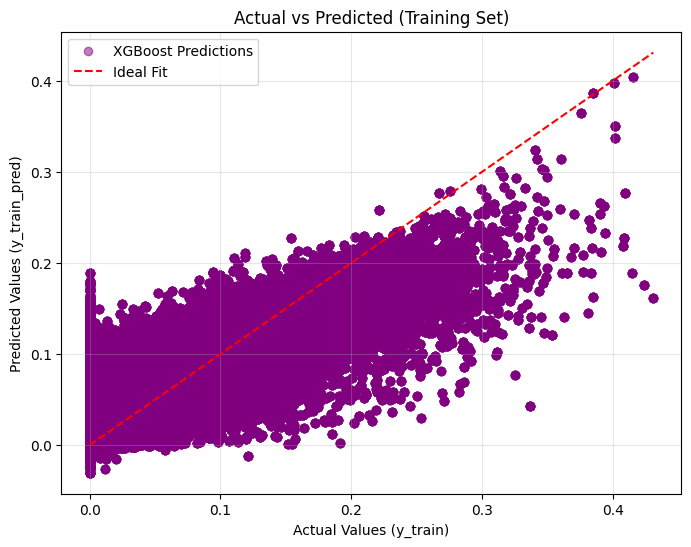

In [20]:
# === Prediction on the training set using the XGBoost model ===

# Use the trained XGBoost model to predict the target variable for the training set
y_train_pred_xgb = xgb_model.predict(X_train)

# === Visualization: Actual vs Predicted Values (Training Set) ===

# Create a scatter plot to compare actual and predicted values
plt.figure(figsize=(8, 6))  # Set the figure size for better readability
plt.scatter(
    y_train, y_train_pred_xgb, alpha=0.5, color='purple', label='XGBoost Predictions'
)  # Scatter plot of actual vs predicted values
plt.plot(
    [y_train.min(), y_train.max()],
    [y_train.min(), y_train.max()],
    color='red',
    linestyle='--',
    label='Ideal Fit',
)  # Plot the ideal fit line (y = x) for reference
plt.title('Actual vs Predicted (Training Set)')  # Add a title to the plot
plt.xlabel('Actual Values (y_train)')  # Label for the x-axis
plt.ylabel('Predicted Values (y_train_pred)')  # Label for the y-axis
plt.legend()  # Add a legend to distinguish the scatter points and the ideal fit line
plt.grid(alpha=0.3)  # Add a grid with light transparency for better visualization
plt.show()  # Display the plot


#### **Análisis del modelo**

---

### **Resultados**

#### **Comparacion grafica de los modelos**

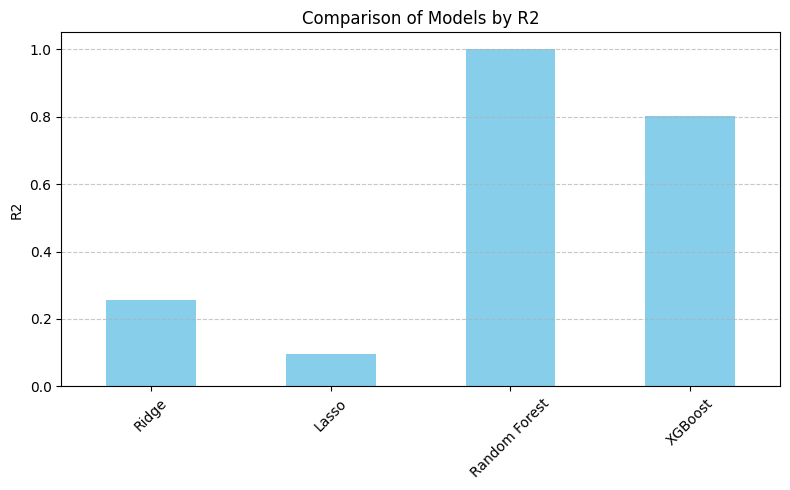

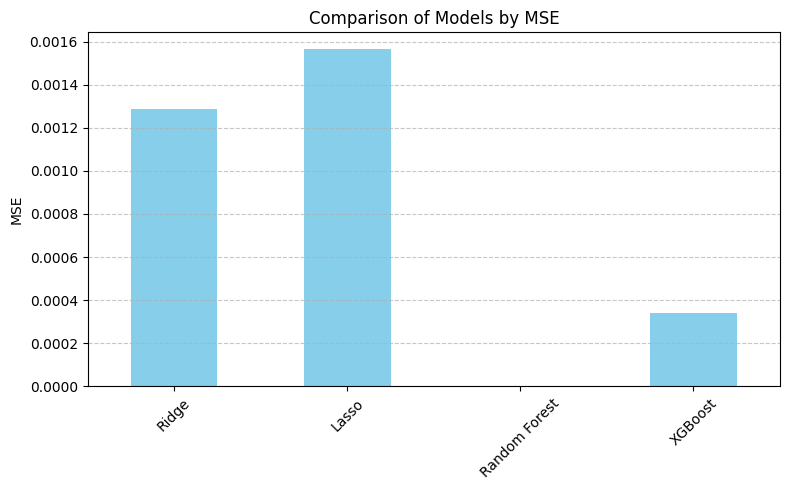

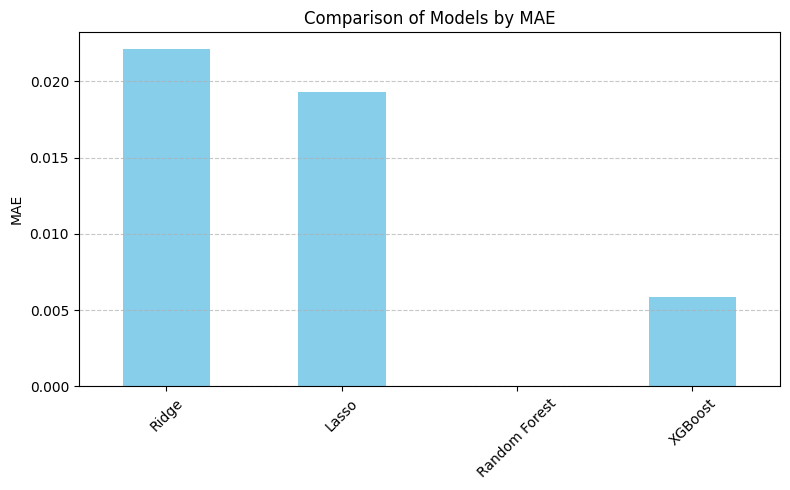

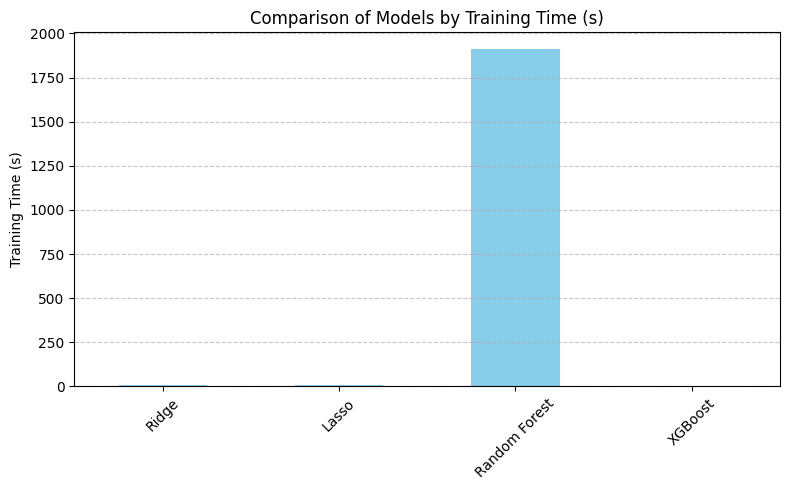

In [21]:
# Convert the model results dictionary to a DataFrame for easier visualization and analysis
result_df_reg = pd.DataFrame(model_results).T  # Transpose the DataFrame to have models as rows and metrics as columns

# Define the list of metrics to visualize
metrics = ['R2', 'MSE', 'MAE', 'Training Time (s)']  # Metrics to evaluate and compare model performance

# Loop through each metric to create a bar plot
for metric in metrics:
    plt.figure(figsize=(8, 5))  # Set the figure size for better readability
    result_df_reg[metric].plot(kind='bar', color='skyblue')  # Create a bar plot with a consistent color scheme
    plt.title(f'Comparison of Models by {metric}')  # Add a title indicating the metric being visualized
    plt.ylabel(metric)  # Label for the y-axis to indicate the metric being plotted
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a dashed grid on the y-axis for better visualization
    plt.tight_layout()  # Adjust the layout to prevent overlapping of elements
    plt.show()  # Display the plot


## **Caso problema: Clasificación de islas de calor urbanas en Barranquilla: Análisis de variables meteorológicas para la caracterización del microclima local**

## **Balanceo de clases**

En *Machine Learning*, una clase se refiere a una de las categorías en las que se agrupan las observaciones dentro de un problema de clasificación. En un conjunto de datos etiquetado, cada instancia está asociada a una clase específica, permitiendo que un modelo aprenda a predecir la categoría correcta para nuevas observaciones.
Cuando el número de ejemplos en cada clase está desproporcionado, se habla de un **desbalance de clases**. Esto ocurre cuando una clase tiene significativamente más ejemplos que otra(s), afectando el desempeño del modelo de clasificación. En estas situaciones, el algoritmo tiende a favorecer la clase mayoritaria, lo que puede llevar a una alta precisión global, pero con un desempeño deficiente en la clase minoritaria.

Para mitigar este problema, se emplean técnicas de balanceo de clases, cuyo objetivo es modificar la distribución de los datos o ajustar la forma en que el modelo aprende. En este estudio, se implementarán tres enfoques principales:

* SMOTE (Synthetic Minority Over-sampling Technique): Es una técnica de sobremuestreo que genera nuevas instancias sintéticas de la clase minoritaria a partir de interpolaciones entre ejemplos existentes.
* ADASYN (Adaptive Synthetic Sampling): Similar a SMOTE, pero con la particularidad de generar más ejemplos en aquellas regiones donde la clase minoritaria es más dispersa, mejorando la representatividad del conjunto de datos.
* Ajuste de pesos con `class_weight='balanced`: Método que modifica la función de costo del modelo para penalizar más los errores en la clase minoritaria, sin necesidad de generar nuevos datos.


## **Contextualización**

El objetivo principal de este estudio es analizar cómo las condiciones meteorológicas varían en distintas áreas geográficas dentro de la misma ciudad. Para ello, se ha considerado como variable objetivo la "localidad". Esta variable se seleccionó debido a que las localidades en la ciudad pueden presentar diferencias significativas en las condiciones climáticas debido a factores geográficos, como la proximidad a cuerpos de agua, la altitud o la urbanización. Las diferencias en la temperatura, la precipitación, la humedad y otros factores climáticos pueden ser significativas entre localidades, lo que lleva a la formación de microclimas.

La localidad se define como una zona geográfica que agrupa uno o más barrios, lo que facilita el análisis de variabilidad no solo a nivel de ciudad, sino también de pequeñas áreas urbanas dentro de la misma. Este enfoque permite identificar patrones de variabilidad climática que podrían ser esenciales para la planificación urbana, el manejo de recursos naturales o la toma de decisiones a nivel local.

### **Verificación de balance de clases**

In [ ]:
# Ver la distribución de las clases
locality_counts = df['LOCALITY'].value_counts()
print(locality_counts)

# Visualización de la distribución
locality_counts.plot(kind='bar')
plt.title('Distribución de Localidades')
plt.xlabel('Localidad')
plt.ylabel('Número de Registros')
plt.show()


NameError: name 'df' is not defined

La distribución de las clases en la variable "localidad" es bastante equilibrada, ya que cada localidad (Sur, Oriente, Occidente, Norte y Centro) tiene un número similar de registros, con una pequeña diferencia en la localidad Centro, que tiene una instancia menos que las otras localidades. Dado que no se observa un desbalance significativo entre las clases, no es necesario aplicar técnicas de balanceo de clases, como SMOTE o ADASYN, para este conjunto de datos.

## **Modelos Benchmark**

Ya teniendo la certeza de que las clases seencuentran balanceada, se procede entonces a ejecutar los modelos de referencia para el modelo de clasificación, en este caso ejecutaremos K-Nearest Neighbors (KNN), Clasificación de Bayes, Regresión Logística (Regularización L1/L2 - Ridge, Lasso respectivamente), Decision Tree, Random Forest, XGBoost (Lime), y Máquinas de Soporte Vectorial (SVM). Para cada caso analizaremos...

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Definir variables predictoras (X) y variable objetivo (y) para clasificación de islas de calor
X = df[[
    'T2M', 'RH2M', 'WS10M', 'PS', 'T2MDEW', 'T2MWET', 'WS50M'
]]

y = df['ICU_Categoria']  # Etiqueta categórica: niveles de isla de calor

# Dividir el dataset en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar el modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)

# Entrenar el modelo
knn.fit(X_train, y_train)

# Predecir con el conjunto de prueba
y_pred = knn.predict(X_test)

# Evaluar el modelo: Reporte de clasificación
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

# Matriz de confusión
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))

# Curva ROC y AUC
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test), pos_label=1)
roc_auc = roc_auc_score(y_test, y_pred)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.title("Curva ROC para KNN")
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.legend(loc='lower right')
plt.show()

